# Netflix Originals- EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import chart_studio
import chart_studio.plotly as py



In [2]:
df=pd.read_csv('NetflixOriginals.csv')

#Shape of data tells us the no. of columns and rows in a dataset.
df.shape

(584, 6)

In [5]:
# This gives us top 5 rows with columns name
df.head()

Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi

In [3]:
df

Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019       58         2.5          English/Japanese  
1      August 21, 2020       81         2.6                   Spanish  
2    December 26, 2019       79         2.6                   Italian  
3     January 19, 2018       94         3.2                   English  
4     October 30, 2020       90         3.4                     Hindi  
..                 ...      ...         ...                       ...  
579  December 31, 2018      125         8.4                   English  
580    October 9, 2015       91         8.4  English/Ukranian/Russian  
581  December 16, 2018      153         8.5                   English  
582   December 8, 2020       89         8.6                Portuguese  
583    October 4, 2020       83         9.0                   English  

[584 rows x 6 columns]

In [33]:
df.shape

(584, 6)

In [34]:
# get the information about the attributes present in the data
df.describe()

Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000

In [6]:
df.isnull().values.any()

False

In [35]:
# To get information about data type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


#### There are no null values in our dataset.

#### Converting the object type data type of Premiere column to Datetime datatype

In [3]:
df["Premiere"]=df["Premiere"].apply(pd.to_datetime)

In [5]:
df["Premiere"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Premiere, Length: 584, dtype: datetime64[ns]

### We will dive straight into the EDA

# EDA


#### What is the distribution count of all the movies with respect to IMDB Score?

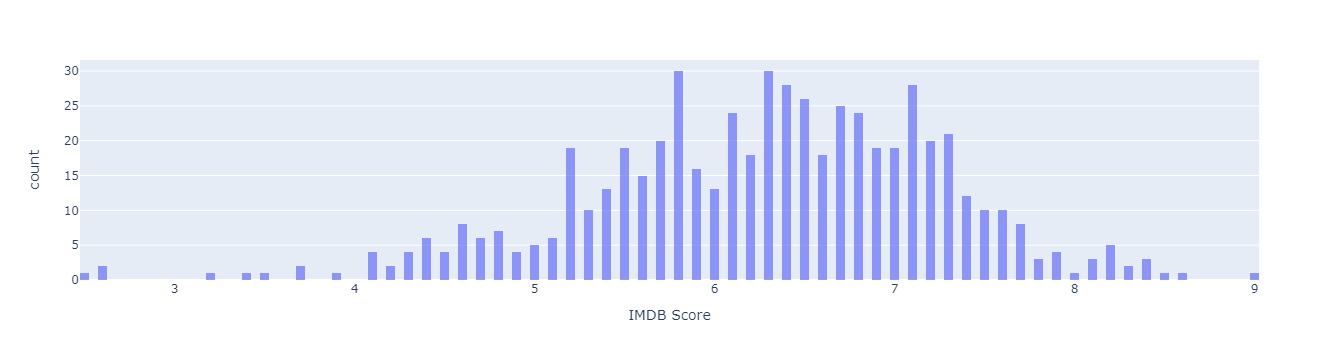

In [8]:
px.histogram(df,x="IMDB Score",nbins=135,opacity=0.7)

#### IMDB Score has normal distribution with major number of movies having rating 5.8-6.5. 

#### What is the distribution count of Running time of all the movies?

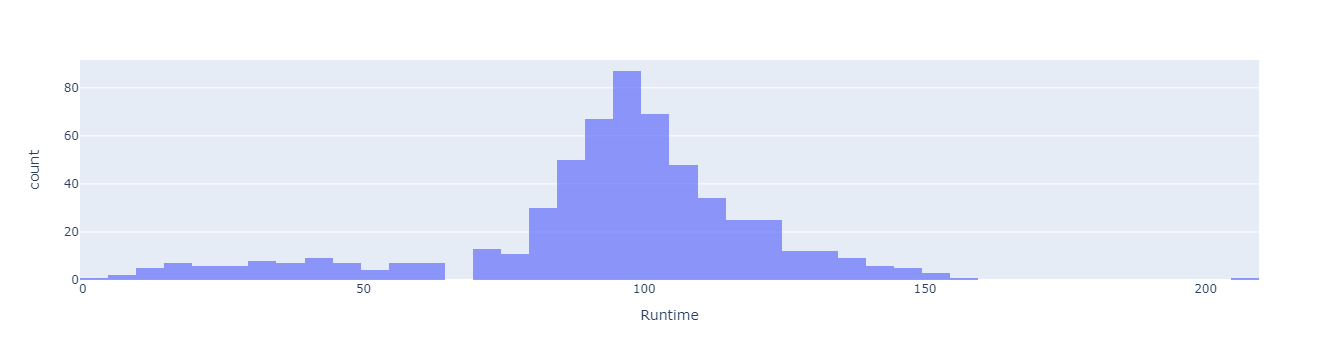

In [6]:
px.histogram(df,x='Runtime',nbins=100,opacity=0.7)

#### Most movies have an average runtime of 95-99 minutes.

#### What is the distribution count of different Languages?

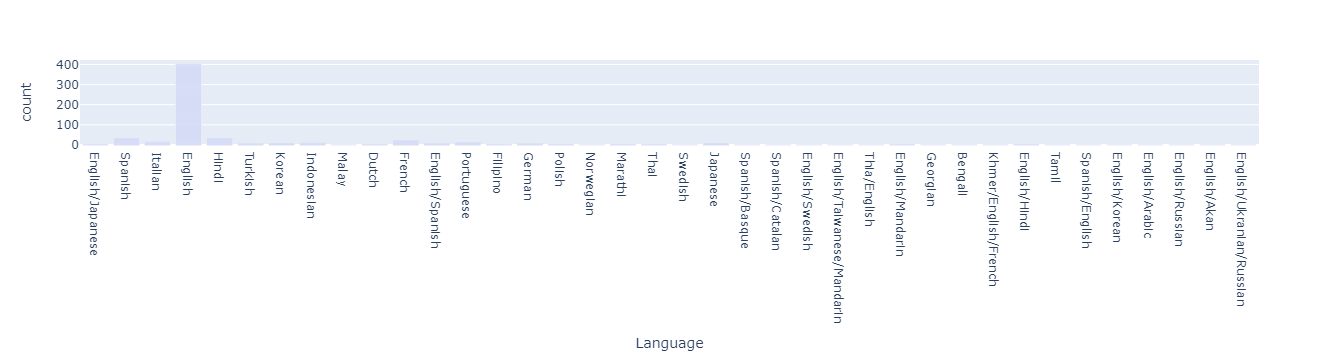

In [23]:
px.bar(df,x="Language",opacity=1)

#### Most movies are english.

#### What is the distribution count of Genres in Netflix Originals?

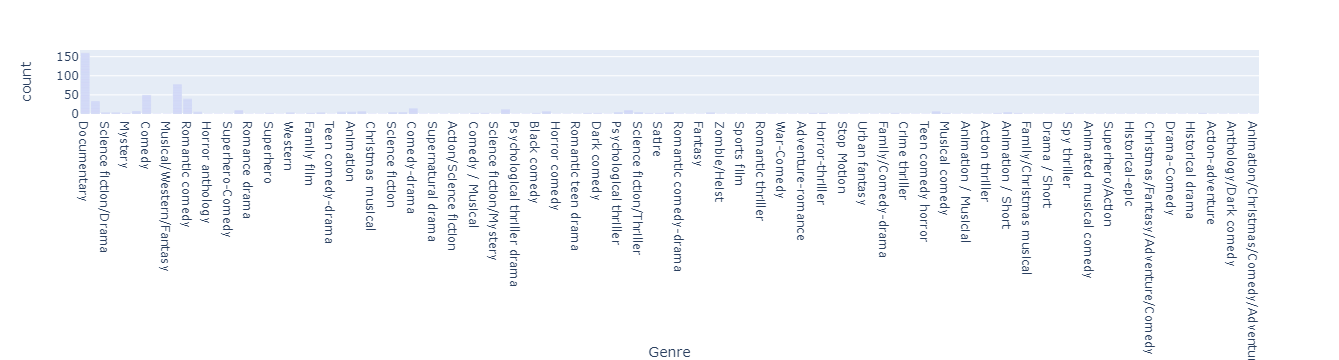

In [22]:
px.bar(df,x="Genre",opacity=0.7)

#### Most of the Netflix originals are Documentary followed comedy and romantic comedy.

#### Boxplot of IMDB Score

In [10]:
df["IMDB Score"].mean()

6.2717465753424655

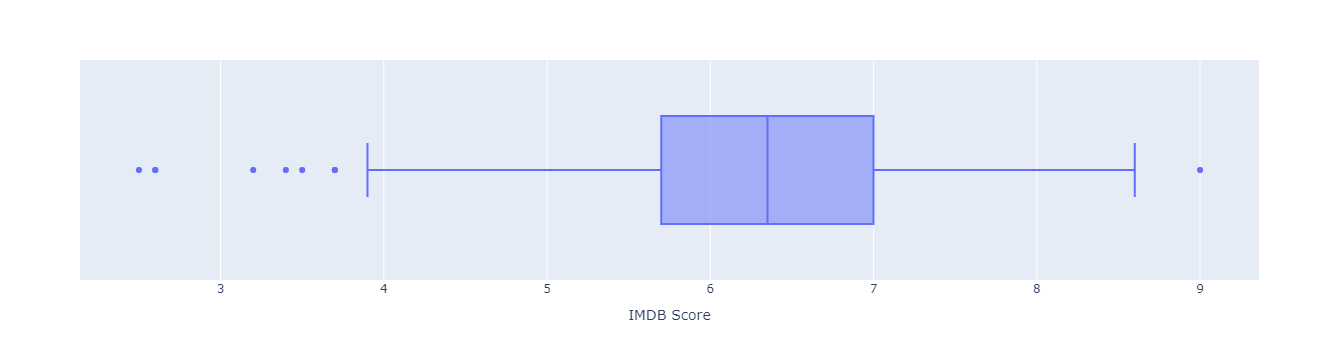

In [9]:
px.box(df,x="IMDB Score",labels='Boxplot of IMDB Score')

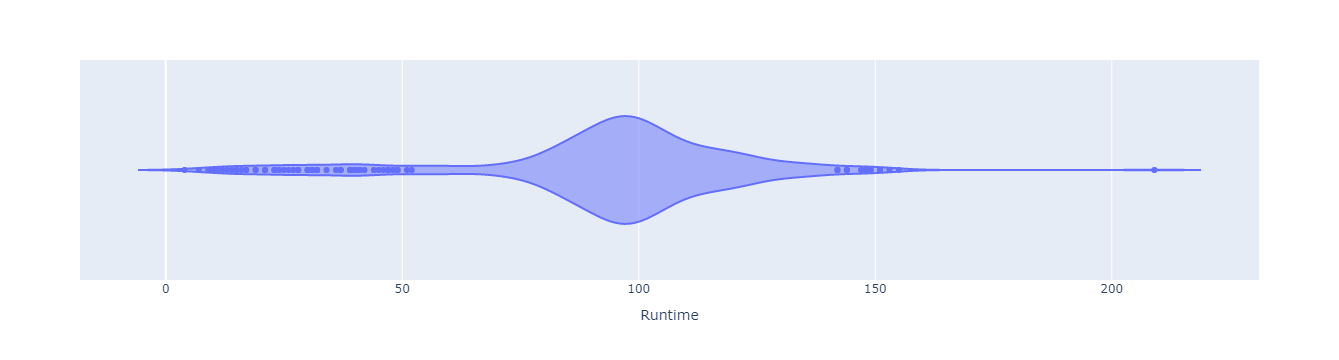

In [13]:
px.violin(df,x="Runtime")

#### What is the maximum Runtime of the movies?

In [17]:
df[df["Runtime"].values==df["Runtime"].max()]

Title        Genre           Premiere  Runtime  IMDB Score  \
561  The Irishman  Crime drama  November 27, 2019      209         7.8   

    Language  
561  English

#### What is the movie with minimum runtime among all the movies?

In [18]:
df[df["Runtime"].values==df["Runtime"].min()]

Title          Genre       Premiere  Runtime  IMDB Score Language
40  Sol Levante  Anime / Short  April 2, 2020        4         4.7  English

#### What is the movie with the highest IMDB score?

In [19]:
df[df["IMDB Score"].values==df["IMDB Score"].max()]

Title        Genre         Premiere  \
583  David Attenborough: A Life on Our Planet  Documentary  October 4, 2020   

     Runtime  IMDB Score Language  
583       83         9.0  English

#### What is the movie with the lowest IMDB score?

In [21]:
df[df["IMDB Score"].values==df["IMDB Score"].min()]

Title        Genre        Premiere  Runtime  IMDB Score  \
0  Enter the Anime  Documentary  August 5, 2019       58         2.5   

           Language  
0  English/Japanese

# Bivariate Analysis

#### What is trend of movies with IMDB score?

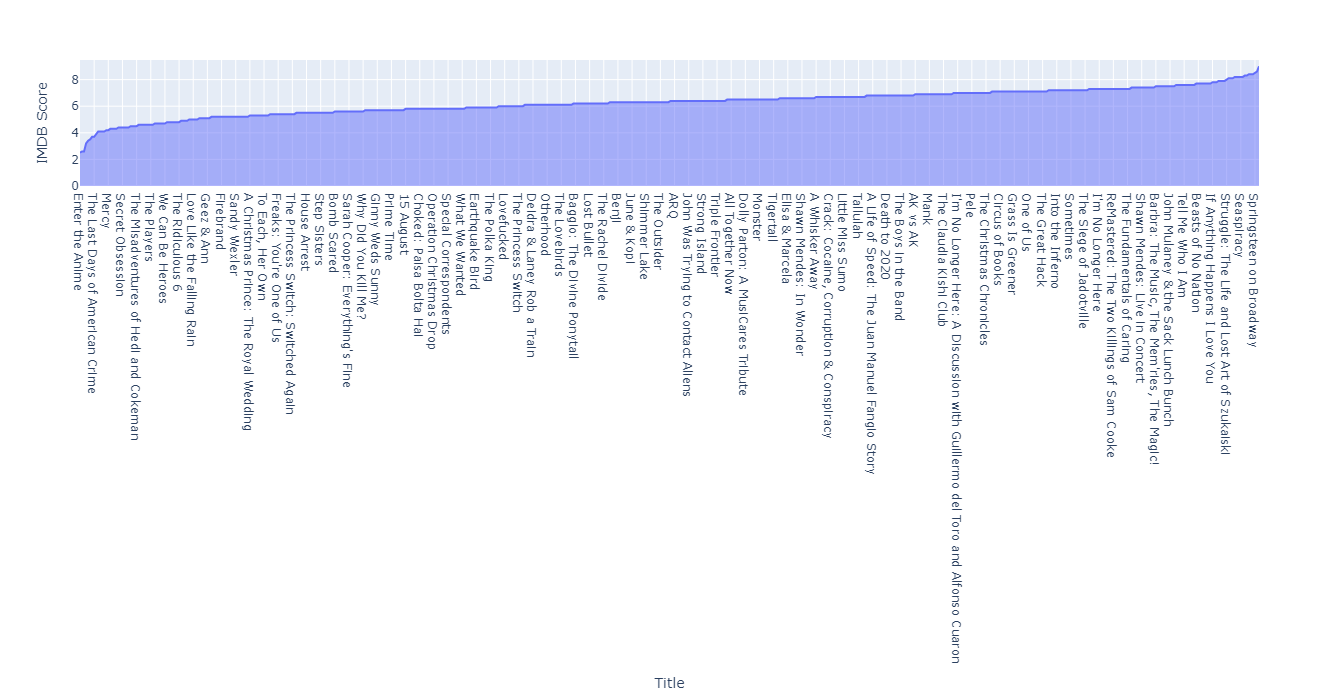

In [24]:
px.area(df,x="Title",y="IMDB Score",height=700)

#### Most of the netflix originals movies had low IMDB score in the starting but over the time their IMDB score has improved drastically.

#### What is different Runtime of different movies?

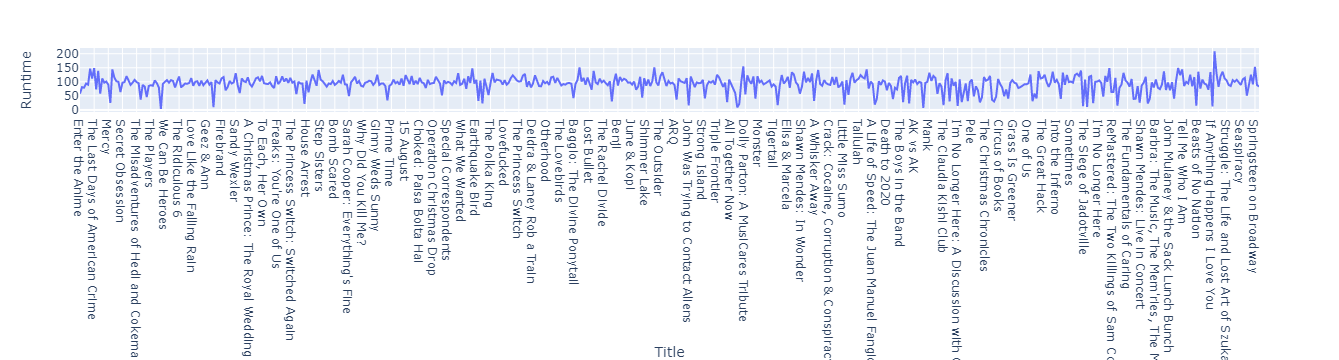

In [42]:
px.line(df,"Title","Runtime")

#### What are the different movies with different genres available?

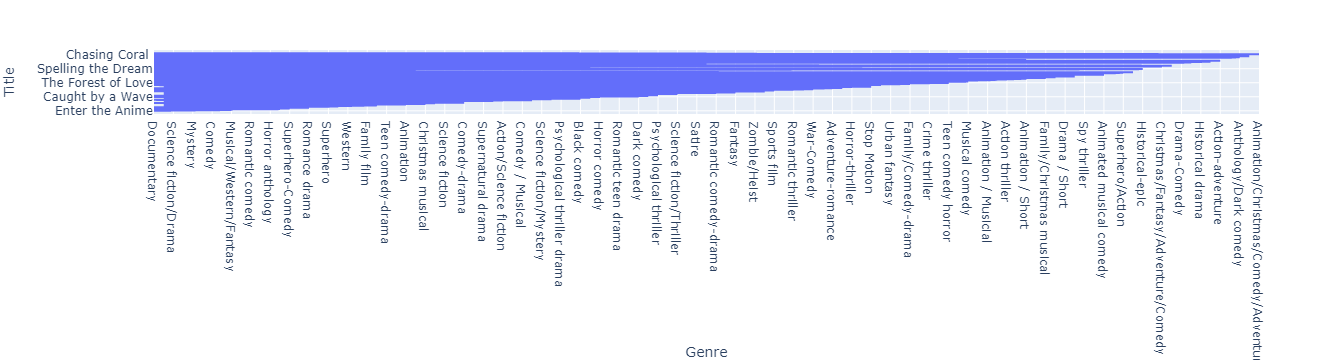

In [29]:
px.line(df,x="Genre",y="Title")

#### What is the trend of IMDB Score over the past years?

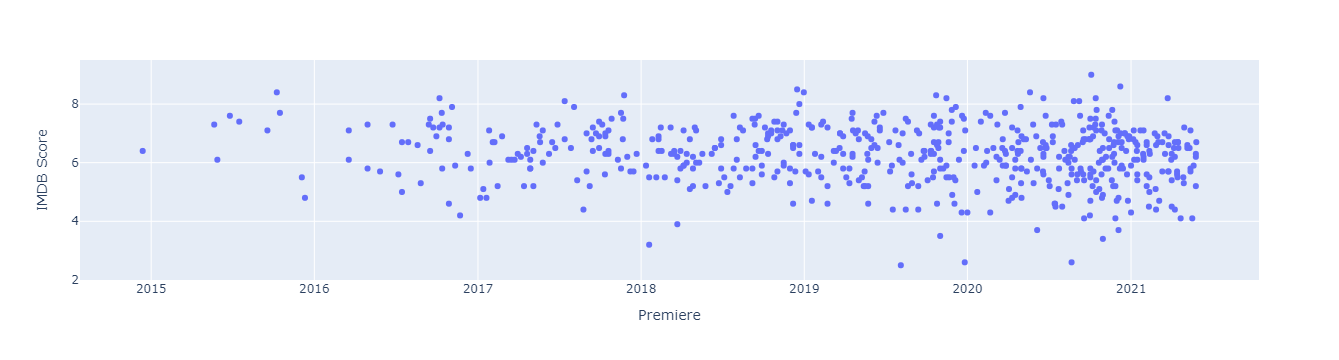

In [25]:
px.scatter(df,x="Premiere",y="IMDB Score")

#### What different types of Genres netflix has with respect to IMDB score?

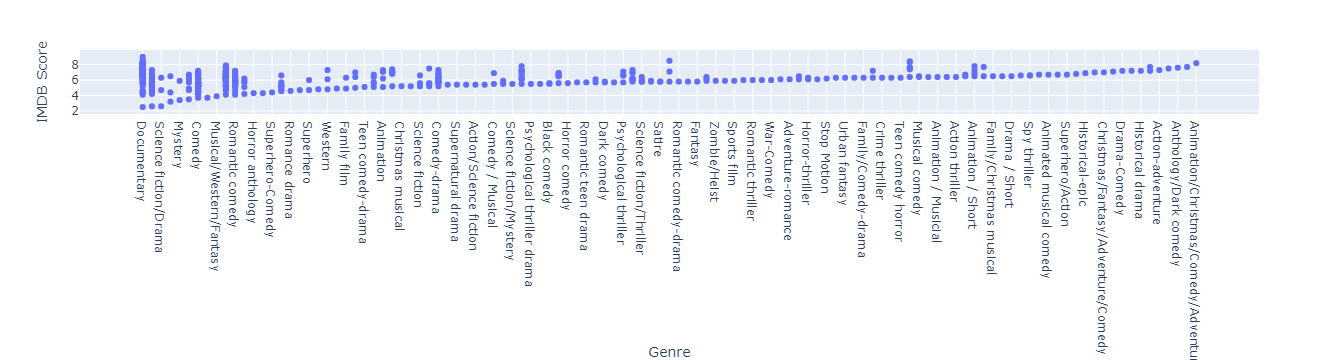

In [26]:
px.scatter(df,x="Genre",y="IMDB Score")

#### Netflix has wide range of genres but documentaries have very good rating followed by Drama Genre.

#### Is there any trend with IMDB score with in which language the Netflix original is available in?

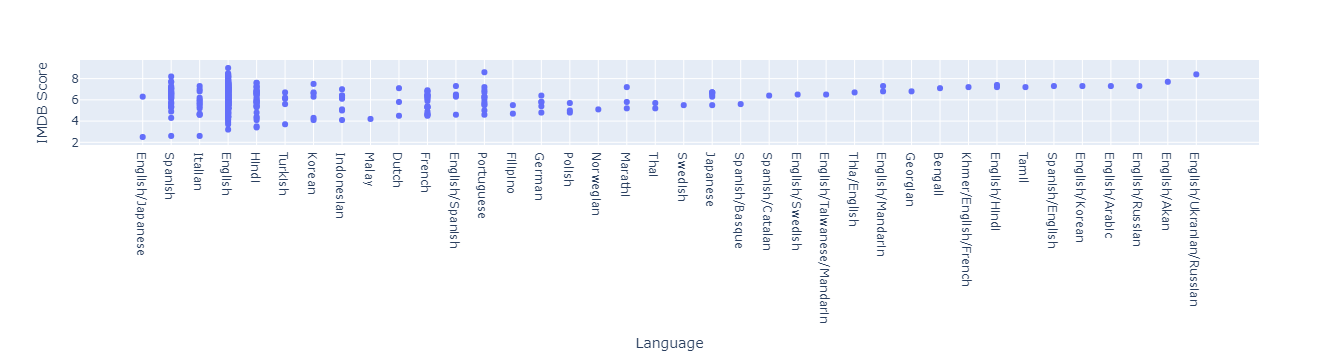

In [56]:
px.scatter(df,x="Language",y="IMDB Score")

#### There are wide range of languages available with english being most common and also the regional languages.

#### What is the trend of premiere of Netflix Originals over the year?

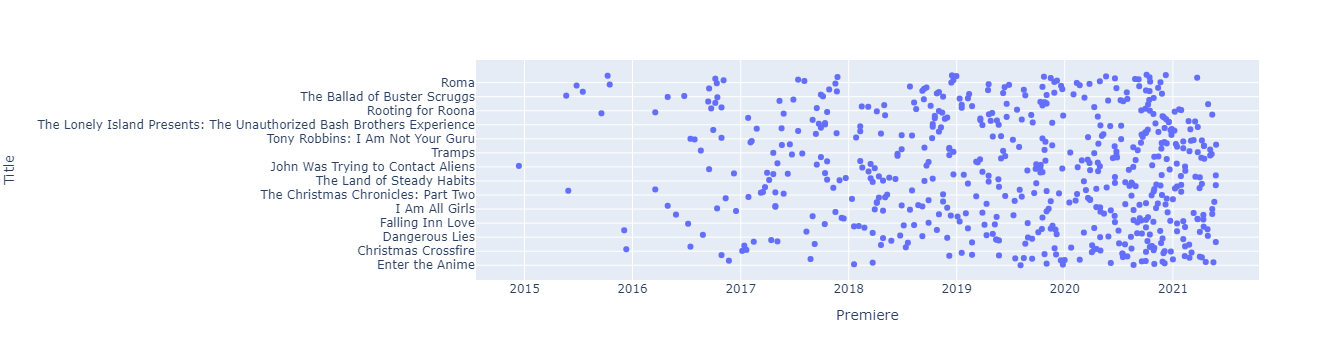

In [27]:
px.scatter(df,x="Premiere",y="Title")

#### Over the years more movies have been released by Netflix.

# Multi-variate Analysis

#### How are different Movies and Genres performing with respect to IMDB Score?

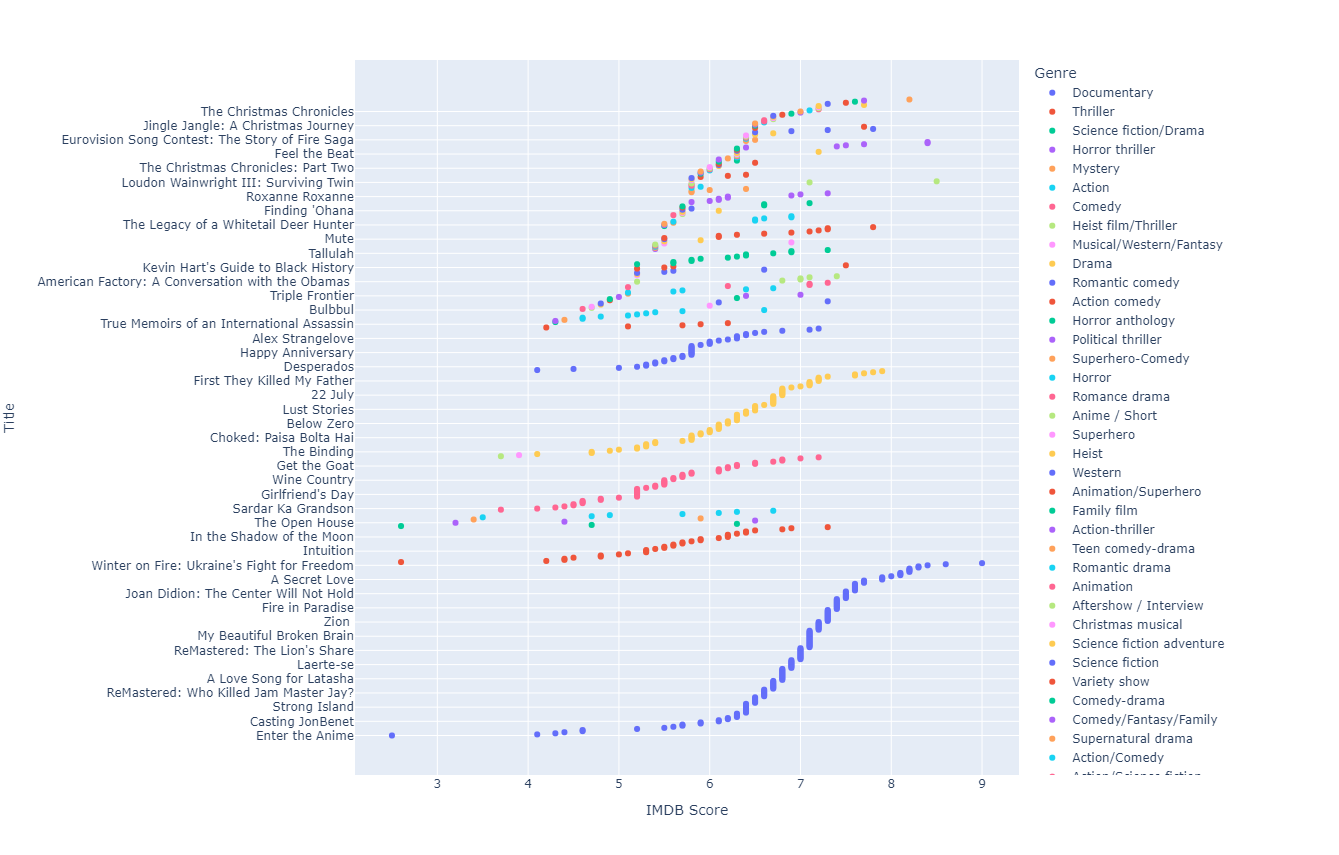

In [28]:
px.scatter(df,x="IMDB Score",y="Title",color="Genre",height=855)

#### What is the trend of Movies over the years with respect to IMDB Score?

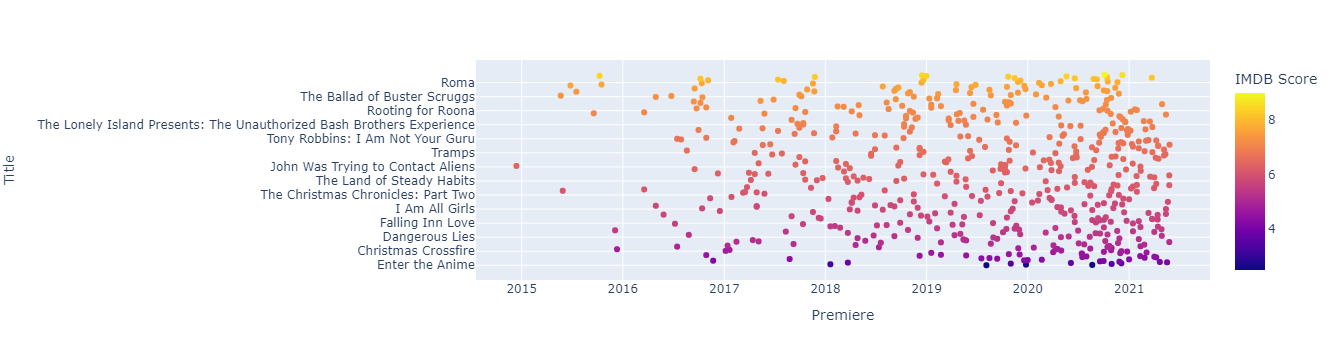

In [16]:
px.scatter(df,x="Premiere",y="Title",color="IMDB Score")

#### What is the trend of movies released with different languages?

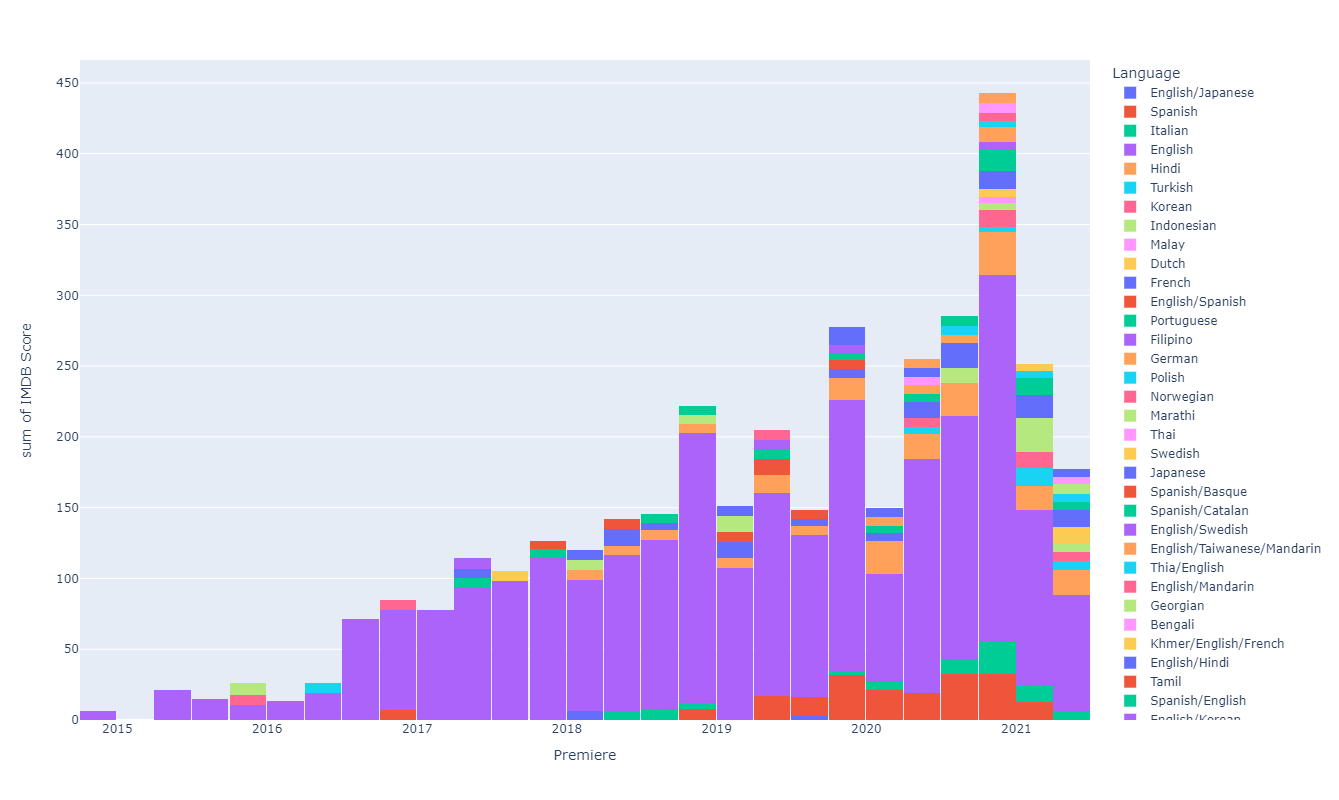

In [29]:
px.histogram(df,x="Premiere",y="IMDB Score",color="Language",height=800)

#### What are the different movies with different runtime are available with different languages?

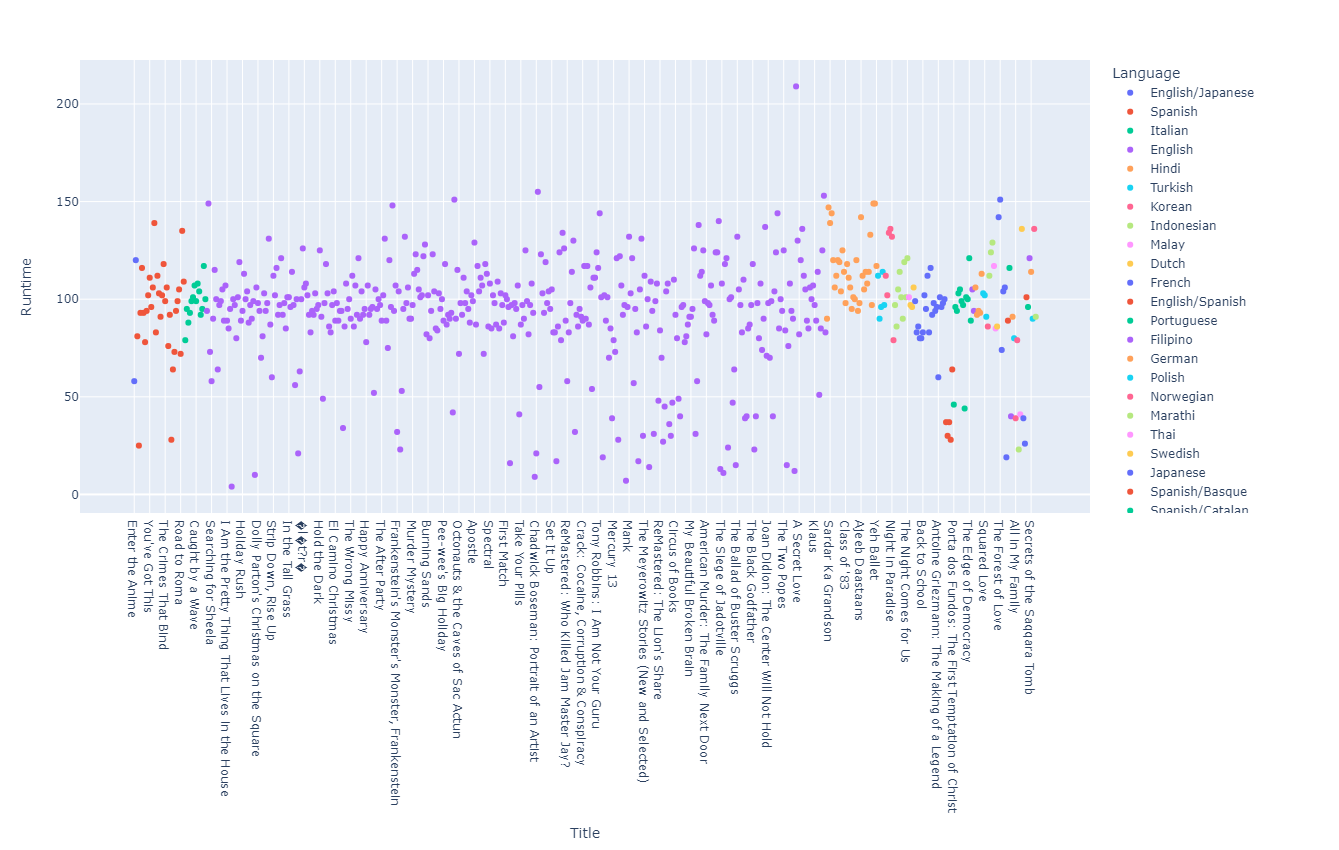

In [111]:
px.scatter(df,x="Title",y="Runtime",color="Language",height=850)

#### Most of the Movies have an average runtime of 100 minutes and most of them are available in English language.

#### What kind of different genres of netflix originals have released?

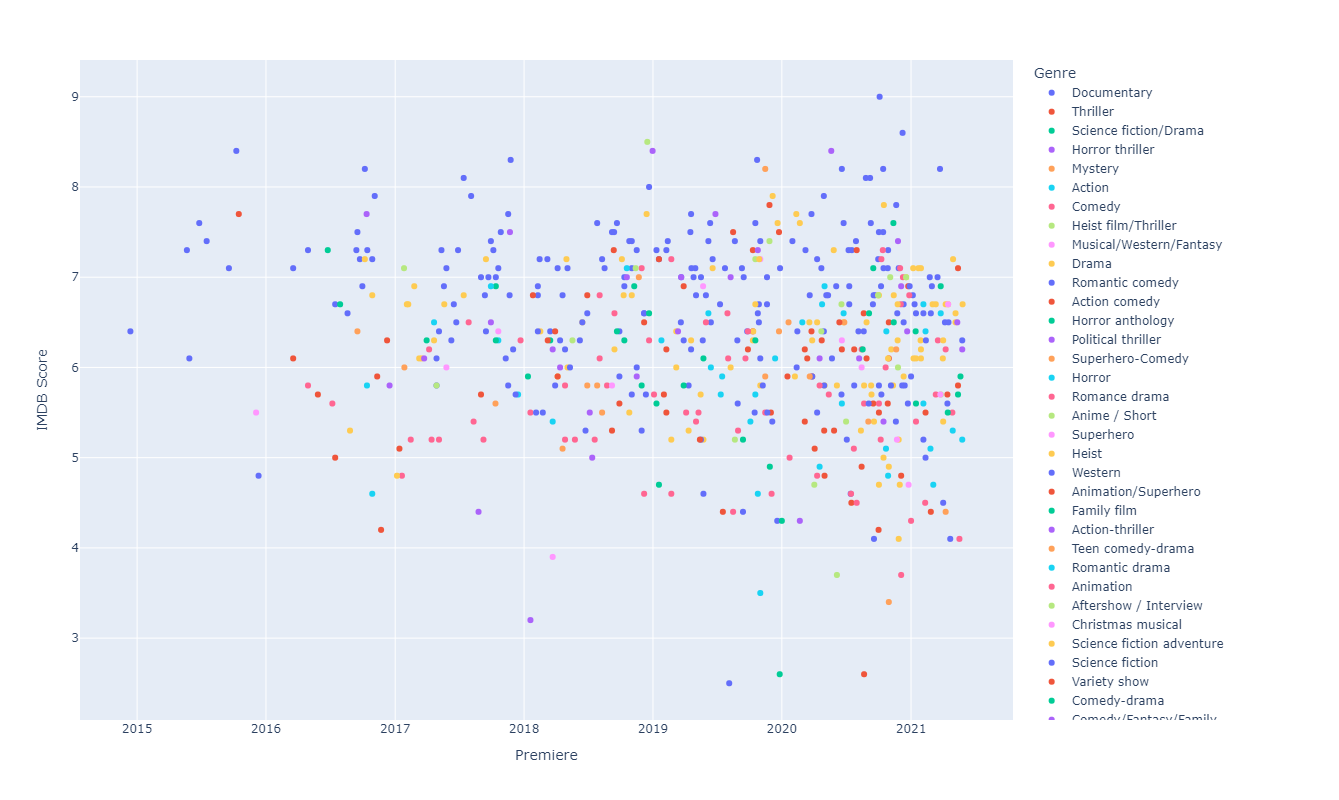

In [30]:
px.scatter(df,x="Premiere",y="IMDB Score",color="Genre",height=800)

#### Netflix Documentaries have performed well over the years rather than any other genres.

#### Is there any trend of IMDB score with runtime of movies?

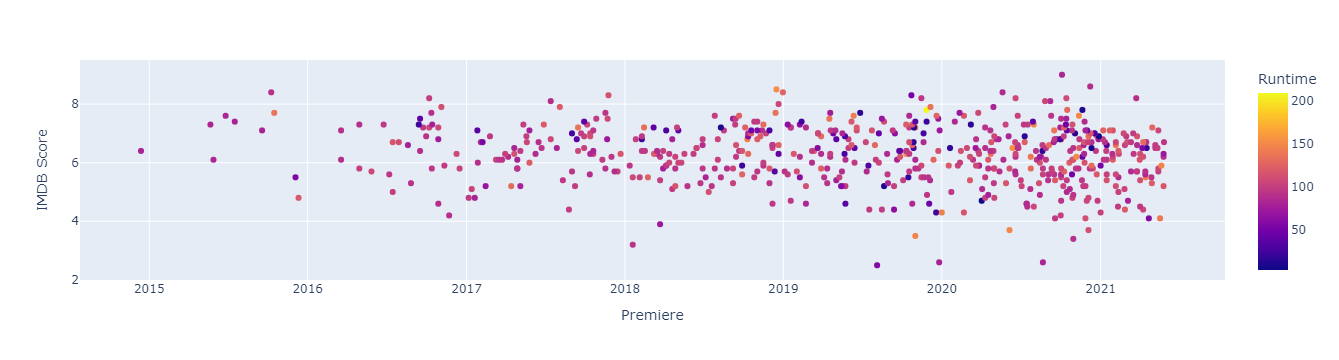

In [129]:
px.scatter(df,x="Premiere",y="IMDB Score",color="Runtime")

#### There is not much of trend of movies IMDB score with runtime of it.